# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from Weather_Vacation_api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1  # Reset record count to 1, not 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric" # Added units=metric for Celsius

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:  # More specific exception handling
        print("City not found. Skipping...")
        pass


    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao jose da coroa grande
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | nachingwea
Processing Record 10 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | severo-yeniseyskiy
Processing Record 16 of Set 1 | muynoq
Processing Record 17 of Set 1 | kamyshlov
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | mazamet
Processing Record 21 of Set 1 

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [4]:
# Display sample data
print('Initial sample of city_data_df dataframe')
display(city_data_df.head())

Initial sample of city_data_df dataframe


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao jose da coroa grande,-8.8978,-35.1478,24.10,80,34,4.42,BR,1731303325
1,saipan,15.1355,145.7010,31.39,81,40,5.14,MP,1731303326
2,yellowknife,62.4560,-114.3525,-13.71,96,75,4.12,CA,1731303067
3,west island,-12.1568,96.8225,28.99,74,40,7.72,CC,1731303328
4,puerto natales,-51.7236,-72.4875,5.36,88,96,3.10,CL,1731303330


In [5]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 6\Module 6; Class Challenge\python-api-challenge\WeatherPy_&_VacationPy\output_data\cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 6\Module 6; Class Challenge\python-api-challenge\WeatherPy_&_VacationPy\output_data\cities.csv")

# Display sample data
print('Display sample of saved city_data_df dataframe')
display(city_data_df.head())

Display sample of saved city_data_df dataframe


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,sao jose da coroa grande,-8.8978,-35.1478,24.10,80,34,4.42,BR,1731303325
1,1,saipan,15.1355,145.7010,31.39,81,40,5.14,MP,1731303326
2,2,yellowknife,62.4560,-114.3525,-13.71,96,75,4.12,CA,1731303067
3,3,west island,-12.1568,96.8225,28.99,74,40,7.72,CC,1731303328
4,4,puerto natales,-51.7236,-72.4875,5.36,88,96,3.10,CL,1731303330


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

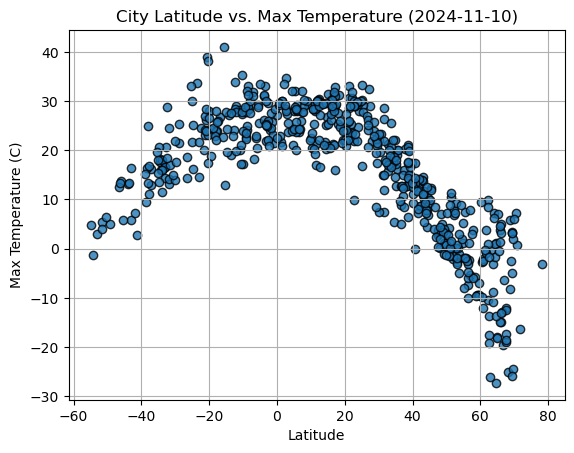

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})") # Dynamic date title
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 6\Module 6; Class Challenge\python-api-challenge\WeatherPy_&_VacationPy\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

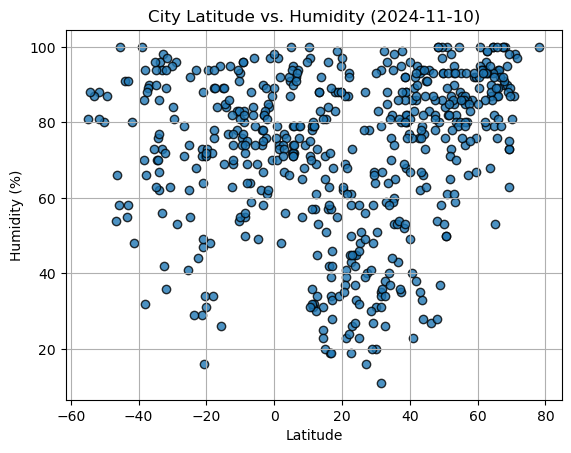

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig(r"C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 6\Module 6; Class Challenge\python-api-challenge\WeatherPy_&_VacationPy\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

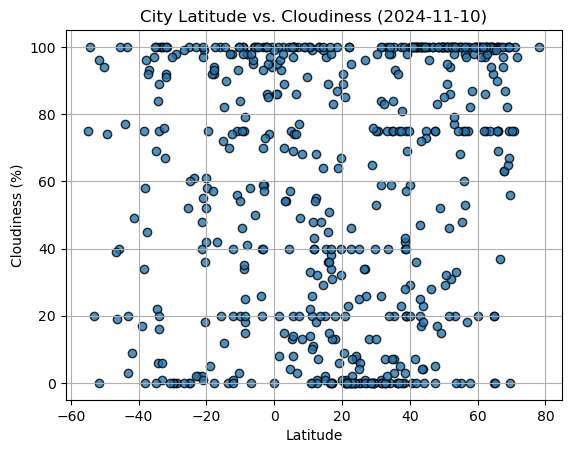

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 6\Module 6; Class Challenge\python-api-challenge\WeatherPy_&_VacationPy\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

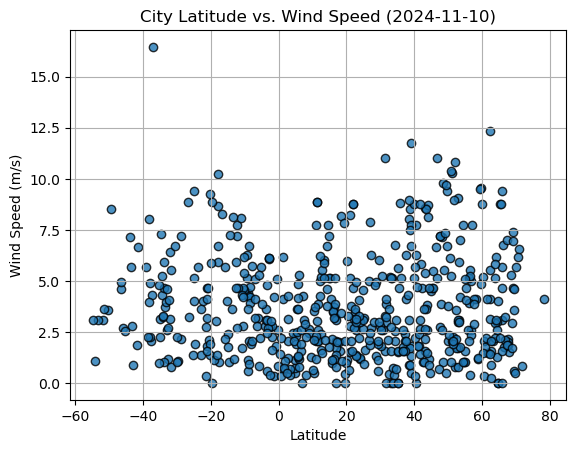

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")  # Note: Units are m/s because we used 'units=metric' in the API call
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 6\Module 6; Class Challenge\python-api-challenge\WeatherPy_&_VacationPy\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

The r-squared is: 0.3735032196282128


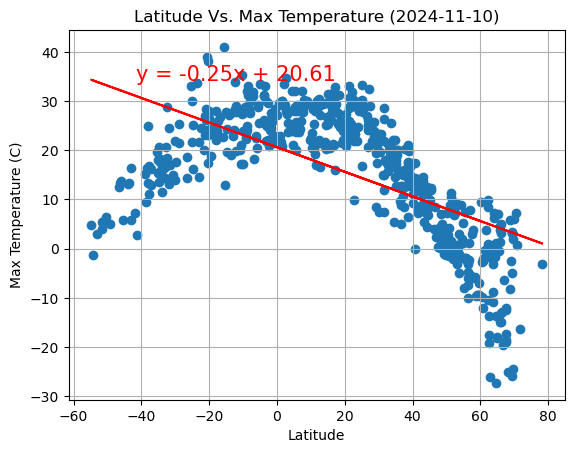

The r-squared is: 0.01635587606231217


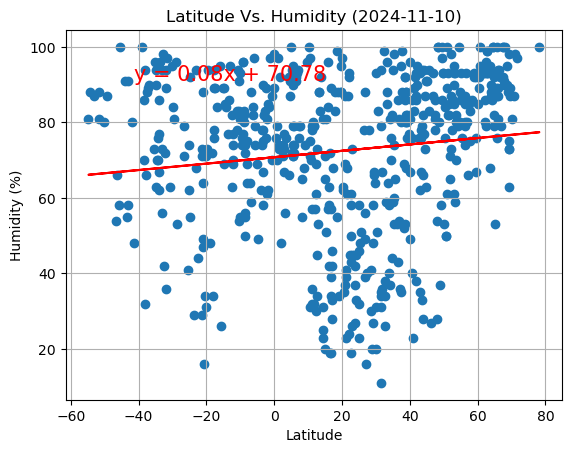

The r-squared is: 0.02160737912202016


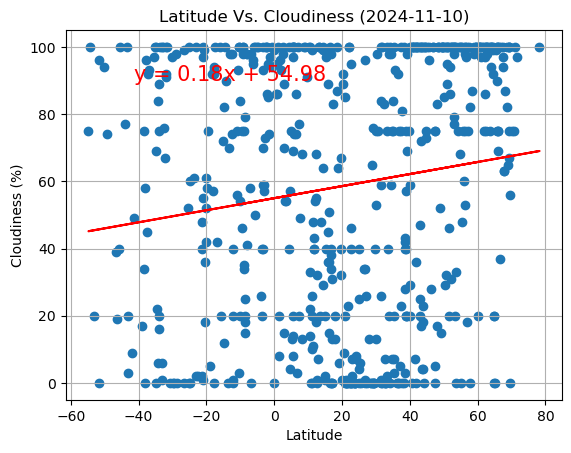

The r-squared is: 8.798548517096969e-05


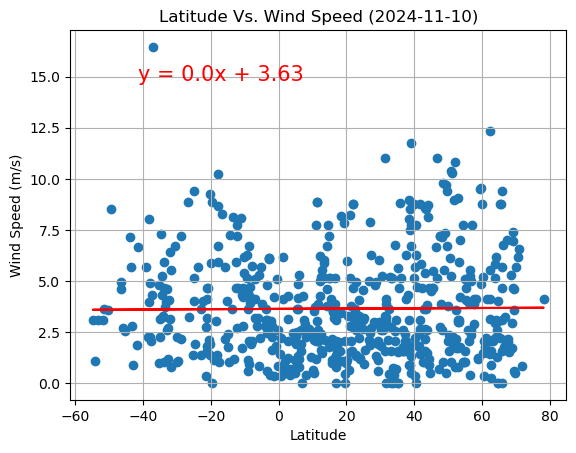

In [11]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label):
    """Creates a scatter plot with linear regression line and equation."""

    plt.figure()  # Create a new figure for each plot

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Dynamically position the annotation
    x_min = x_values.min()
    x_range = x_values.max() - x_min  # Range of x-values
    y_min = y_values.min()
    y_range = y_values.max() - y_min # Range of y-values
    plt.annotate(line_eq,(x_min + 0.1 * x_range, y_min + 0.9 * y_range),fontsize=15,color="red") # Position at 10% x, 90% y


    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(f"{title} ({time.strftime('%Y-%m-%d')})")
    plt.grid(True)

    print(f"The r-squared is: {rvalue**2}")

    plt.show()


# Example usage: (No need to provide text_coordinates now)
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude Vs. Max Temperature", "Max Temperature (C)")
plot_linear_regression(city_data_df["Lat"], city_data_df["Humidity"], "Latitude Vs. Humidity", "Humidity (%)")
plot_linear_regression(city_data_df["Lat"], city_data_df["Cloudiness"], "Latitude Vs. Cloudiness", "Cloudiness (%)")
plot_linear_regression(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude Vs. Wind Speed", "Wind Speed (m/s)")

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
print('Display a sample of the northern_hemi_df dataframe')
display(northern_hemi_df.head())

Display a sample of the northern_hemi_df dataframe


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,saipan,15.1355,145.7010,31.39,81,40,5.14,MP,1731303326
2,2,yellowknife,62.4560,-114.3525,-13.71,96,75,4.12,CA,1731303067
6,6,bilibino,68.0546,166.4372,-25.07,100,87,1.52,RU,1731303332
10,10,ust-nera,64.5667,143.2000,-27.30,100,92,1.28,RU,1731303338
13,13,severo-yeniseyskiy,60.3725,93.0408,-2.77,89,100,5.18,RU,1731303342


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
print('Display a sample of the southern_hemi_df dataframe')
display(southern_hemi_df.head())

Display a sample of the southern_hemi_df dataframe


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,sao jose da coroa grande,-8.8978,-35.1478,24.10,80,34,4.42,BR,1731303325
3,3,west island,-12.1568,96.8225,28.99,74,40,7.72,CC,1731303328
4,4,puerto natales,-51.7236,-72.4875,5.36,88,96,3.10,CL,1731303330
5,5,adamstown,-25.0660,-130.1015,21.57,74,100,4.01,PN,1731303331
7,7,edinburgh of the seven seas,-37.0676,-12.3116,16.18,90,93,16.46,SH,1731303333


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7806116853694284


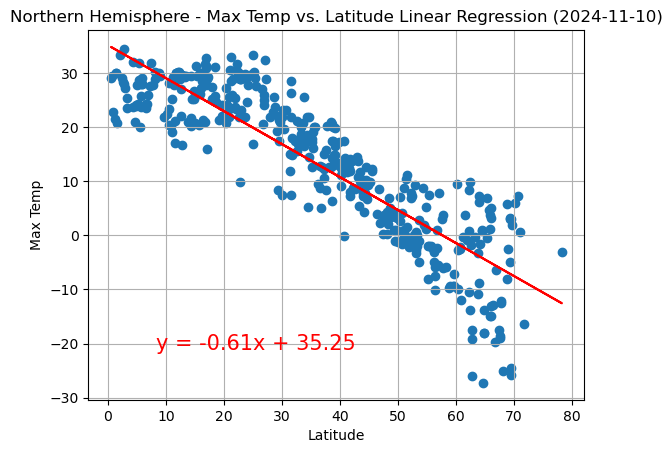

In [14]:
# Linear regression on Northern Hemisphere
# Perform linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.figure() # Create a new figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate with the linear regression equation
x_min = x_values.min()
x_range = x_values.max() - x_min
y_min = y_values.min()
y_range = y_values.max() - y_min
plt.annotate(line_eq,(x_min + 0.1 * x_range, y_min + 0.1 * y_range),fontsize=15,color="red") # Adjust position if needed


plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%Y-%m-%d')})")
plt.grid(True) #add a grid

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.5454946828861958


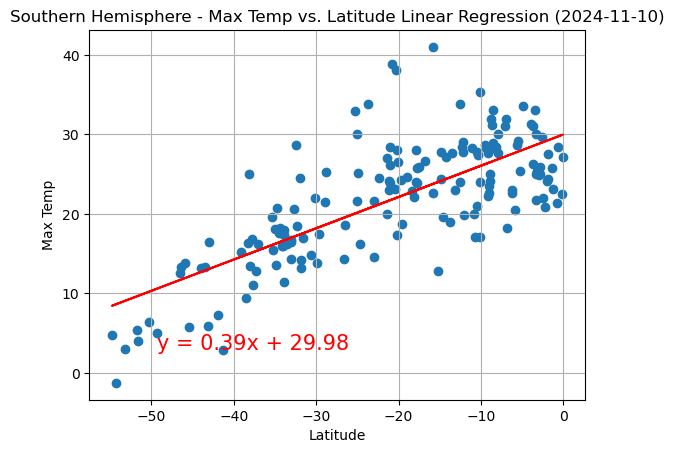

In [15]:
# Linear regression on Southern Hemisphere
# Perform linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.figure() #create a new figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate with linear regression equation
x_min = x_values.min()
x_range = x_values.max() - x_min
y_min = y_values.min()
y_range = y_values.max() - y_min
plt.annotate(line_eq,(x_min + 0.1 * x_range, y_min + 0.1 * y_range),fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%Y-%m-%d')})")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**  
•	Northern Hemisphere: This is a negative correlation. As latitude increases (moving further north), the maximum temperature tends to decrease. This makes sense, as higher latitudes are further from the equator and receive less direct sunlight. The r-squared value will indicate the strength of this negative relationship.
•	Southern Hemisphere: This is a positive correlation. As latitude increases (moving closer to the equator from negative latitudes), the maximum temperature tends to increase. This aligns with the same principle as the northern hemisphere; closer proximity to the equator correlates with higher temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1317510848314133


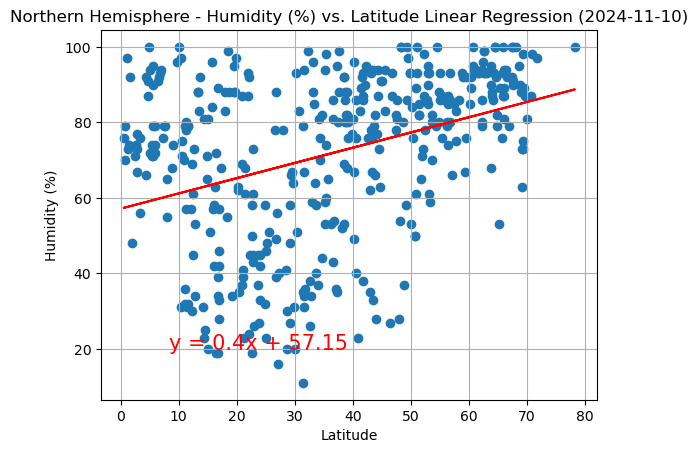

In [16]:
# Northern Hemisphere
# Perform linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.figure() # Create new figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate with linear regression equation
x_min = x_values.min()
x_range = x_values.max() - x_min
y_min = y_values.min()
y_range = y_values.max() - y_min
plt.annotate(line_eq,(x_min + 0.1 * x_range, y_min + 0.1 * y_range),fontsize=15,color="red") # Adjust positioning as needed

plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%Y-%m-%d')})")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 2.0145754459682155e-05


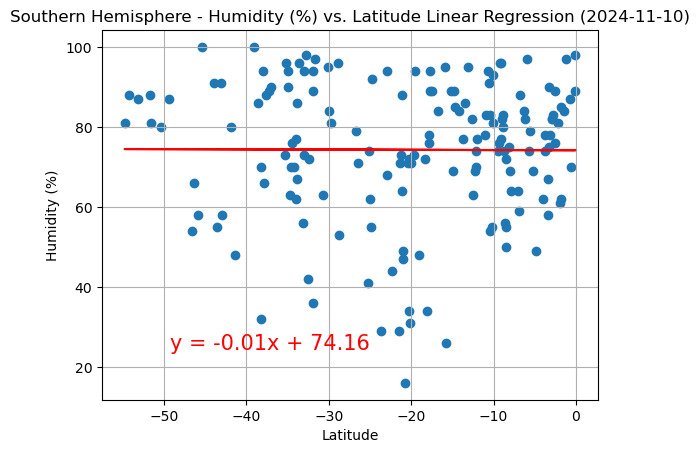

In [17]:
# Southern Hemisphere
# Perform linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.figure() # Create a new figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate with linear regression equation
x_min = x_values.min()
x_range = x_values.max() - x_min
y_min = y_values.min()
y_range = y_values.max() - y_min
plt.annotate(line_eq,(x_min + 0.1 * x_range, y_min + 0.1 * y_range),fontsize=15,color="red")  # Adjust as needed


plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%Y-%m-%d')})")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**
•	Both Hemispheres: The relationship between humidity and latitude is generally weaker and less clear than temperature. There is a slight positive correlation for the northern hemisphere and no discernible trend at all for the southern hemisphere. This is because humidity is influenced by many factors besides latitude, such as proximity to bodies of water, prevailing wind patterns, and overall climate. A low r-squared value is indicative of these weak linear relationships.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.1083554331297936


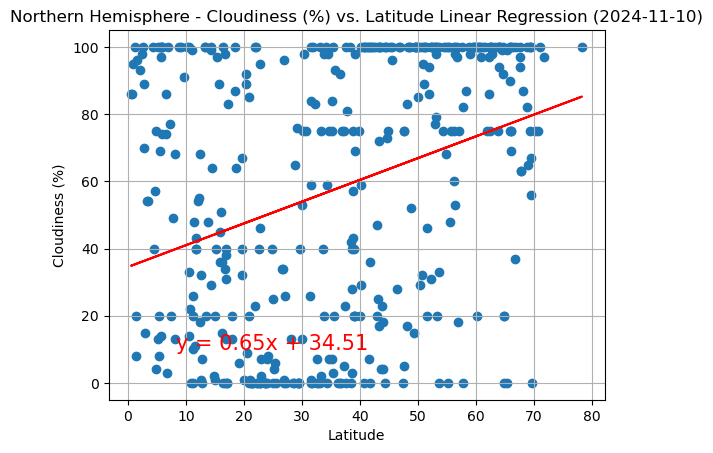

In [18]:
# Northern Hemisphere
# Perform linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.figure() #create a new figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate with linear regression equation
x_min = x_values.min()
x_range = x_values.max() - x_min
y_min = y_values.min()
y_range = y_values.max() - y_min
plt.annotate(line_eq,(x_min + 0.1 * x_range, y_min + 0.1 * y_range),fontsize=15,color="red") # Adjust annotation position as needed

plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%Y-%m-%d')})")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.01786220593561029


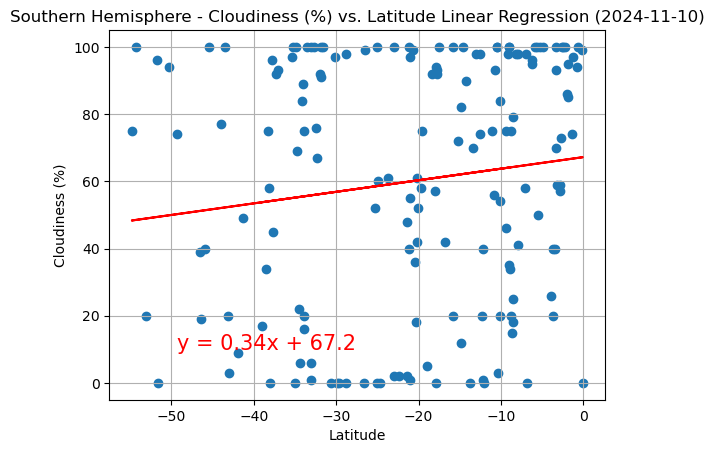

In [19]:
# Southern Hemisphere
# Perform linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.figure()  # Create a new figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate with linear regression equation
x_min = x_values.min()
x_range = x_values.max() - x_min
y_min = y_values.min()
y_range = y_values.max() - y_min
plt.annotate(line_eq,(x_min + 0.1 * x_range, y_min + 0.1 * y_range),fontsize=15,color="red")  # Adjust coordinates as needed

plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%Y-%m-%d')})")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
•	Both Hemispheres: Similar to humidity, the relationship between cloudiness and latitude is often complex and not strongly linear. There might be some patterns based on regional climates and weather systems, but there was only a slight positive correlation across all latitudes in each of the hemispheres. A low r-squared value supports this.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.027383090102424


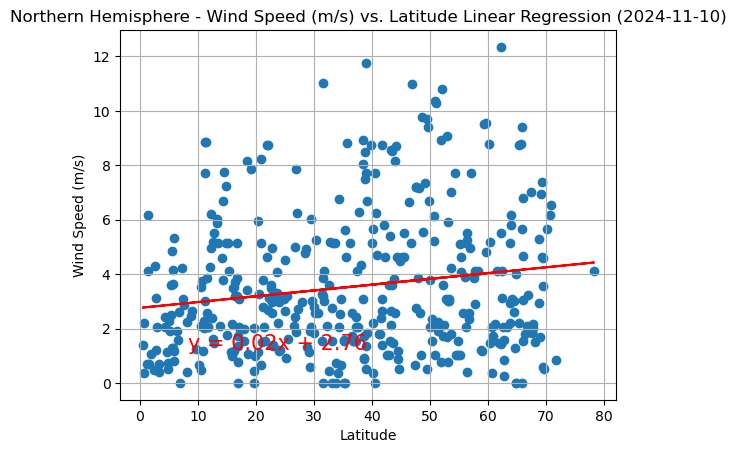

In [20]:
# Northern Hemisphere
# Perform linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.figure()  # Create a new figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate with linear regression equation
x_min = x_values.min()
x_range = x_values.max() - x_min
y_min = y_values.min()
y_range = y_values.max() - y_min
plt.annotate(line_eq,(x_min + 0.1 * x_range, y_min + 0.1 * y_range),fontsize=15,color="red") # Adjust annotation placement if needed

plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression ({time.strftime('%Y-%m-%d')})")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.006227587544343362


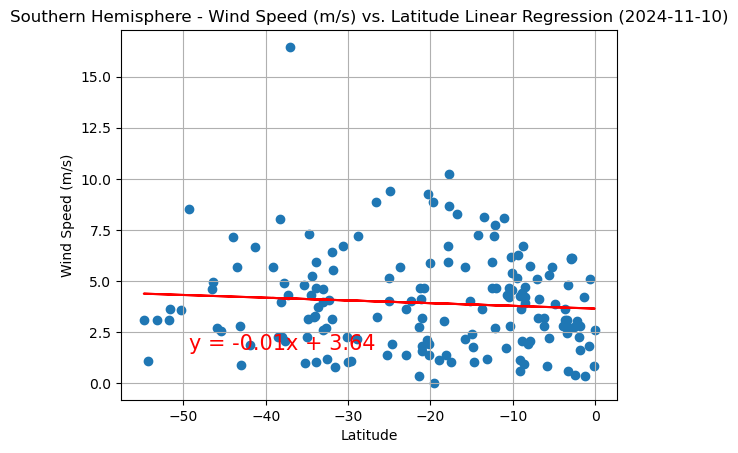

In [21]:
# Southern Hemisphere
# Perform linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.figure() # Create new figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate with linear regression equation
x_min = x_values.min()
x_range = x_values.max() - x_min
y_min = y_values.min()
y_range = y_values.max() - y_min
plt.annotate(line_eq,(x_min + 0.1 * x_range, y_min + 0.1 * y_range),fontsize=15,color="red")  # Adjust placement as needed


plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression ({time.strftime('%Y-%m-%d')})")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**
•	Both Hemispheres: The relationship between wind speed and latitude is variable. While there are slight increases in wind speeds at higher latitudes due to larger pressure gradients and the jet stream, other local factors such as topography and temperature differences play a significant role. Therefore, there was onlya slight positive correlation for the Northern Hemisphere and a slight negative correlation for the Southern Hemisphere.  There were low r-squared values for each of the hemispheres.